In [28]:
from maply.geometry import Polygon
from maply.plot import Map
import geopandas as gpd
import pandas as pd


import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), '..', 'src')))
from sp_geoprocessing import cluster, superparcels

In [29]:
p1 = Polygon(origin=(0,0), size=(1,1), data={'id': 'A'})
p2 = Polygon(origin=(1,0), size=(1,1), data={'id': 'B'})
p3 = Polygon(origin=(0,1), size=(1,1), data={'id': 'A'})
p4 = Polygon(origin=(1,1), size=(1,1), data={'id': 'B'})

p5 = Polygon(origin=(4,0), size=(1,1), data={'id': 'A'})
p6 = Polygon(origin=(4,1), size=(1,1), data={'id': 'A'})
p7 = Polygon(origin=(5,0), size=(1,1), data={'id': 'A'})
p8 = Polygon(origin=(5,1), size=(1,1), data={'id': 'A'})

p9 = Polygon(origin=(4,3), size=(1,1), data={'id': 'A'})
p10 = Polygon(origin=(5,3), size=(1,1), data={'id': 'A'})

p_list = [p1, p2, p3, p4, p5, p6, p7, p8, p9, p10]

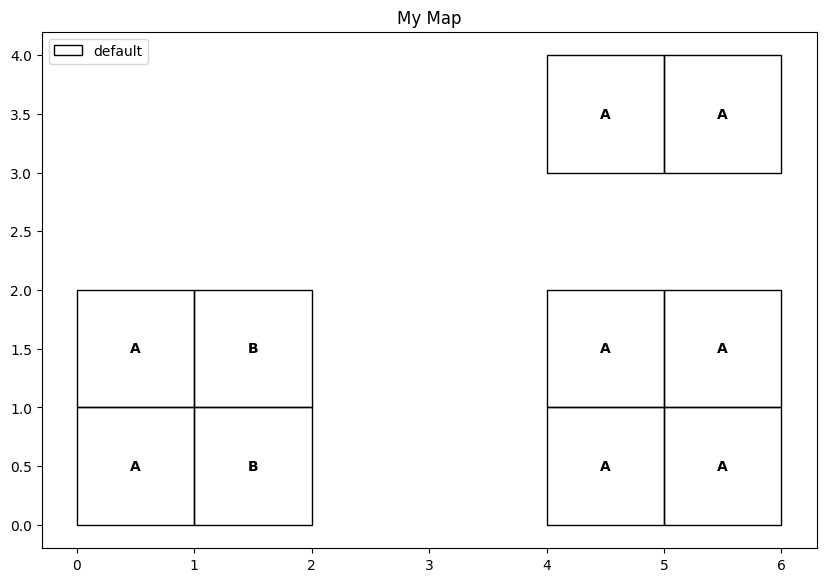

In [30]:
test_map = Map()
for p in p_list:
    test_map.add_shape(p, style={'facecolor': 'none'}, label='id')
test_map.plot()

In [32]:
candidate_parcels = gpd.GeoDataFrame()
for p in p_list:
    candidate_parcels = pd.concat([candidate_parcels, p.to_gdf()], ignore_index=True)
candidate_parcels = candidate_parcels.reset_index(drop=True)
candidate_parcels

,id,geometry
0,A,"POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))"
1,B,"POLYGON ((1 0, 2 0, 2 1, 1 1, 1 0))"
2,A,"POLYGON ((0 1, 1 1, 1 2, 0 2, 0 1))"
3,B,"POLYGON ((1 1, 2 1, 2 2, 1 2, 1 1))"
4,A,"POLYGON ((4 0, 5 0, 5 1, 4 1, 4 0))"
5,A,"POLYGON ((4 1, 5 1, 5 2, 4 2, 4 1))"
6,A,"POLYGON ((5 0, 6 0, 6 1, 5 1, 5 0))"
7,A,"POLYGON ((5 1, 6 1, 6 2, 5 2, 5 1))"
8,A,"POLYGON ((4 3, 5 3, 5 4, 4 4, 4 3))"
9,A,"POLYGON ((5 3, 6 3, 6 4, 5 4, 5 3))"


In [ ]:
# multi step eps
eps_list = [6, 3]

for owner in candidate_parcels['id'].unique():
    print(f'Owner: {owner}')
    owner_parcels = candidate_parcels[candidate_parcels['id'] == owner]
    for eps in eps_list:
        print(f'Eps: {eps}')
        clusters = cluster.build_owner_clusters(
            owner_parcels, 
            min_samples=3,
            eps=eps
        )
        
        print(clusters)
    print('______')

Owner: A
Eps: 6
[0 0 0 0 0 0 0 0]
Eps: 3
[0 0 0 0 0 0 0 0]
______
Owner: B
Eps: 6
[]
Eps: 3
[]
______
